<a href="https://colab.research.google.com/github/vpapoglou/Machine-Learning-Auth/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Εισαγωγή Βιβλιοθηκών

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#1. Εισαγωγή Δεδομένων

In [19]:
df = pd.read_csv("wine-missing.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,unknown,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,unknown,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Περιγραφή χαρακτηριστικών και Ιστόγραμμα

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

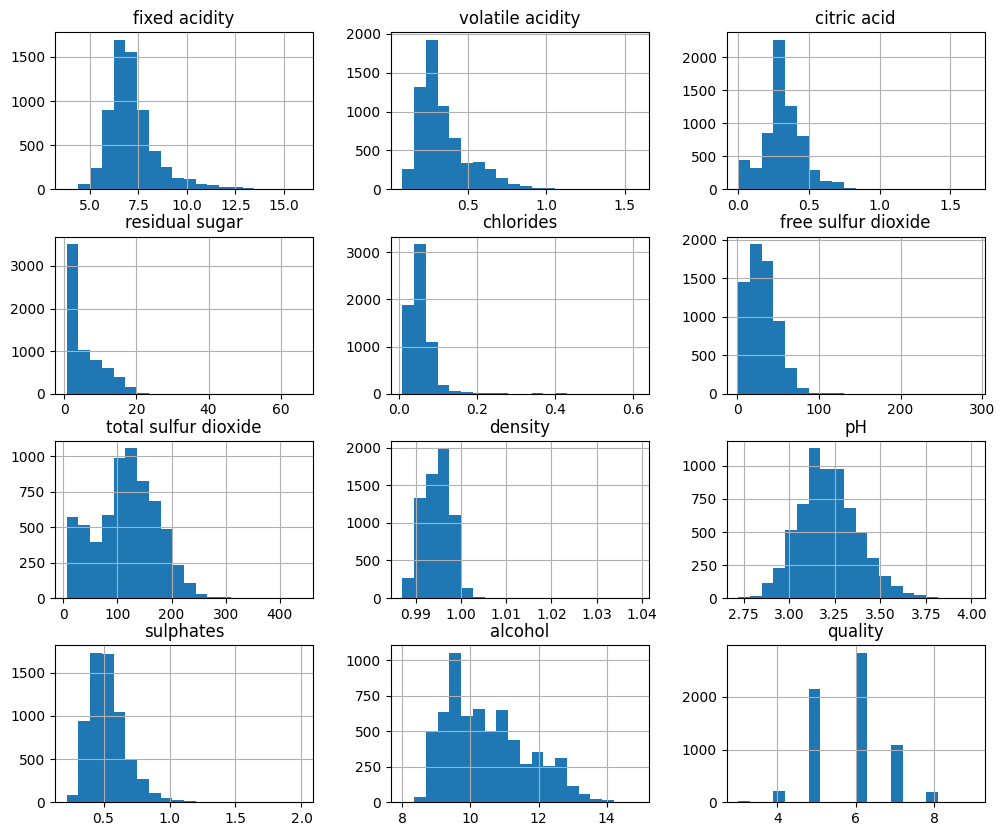

In [20]:
print(df.describe())

df.hist(figsize=(12, 10), bins=20)
plt.show()

# Ραβδόγραμμα για Type

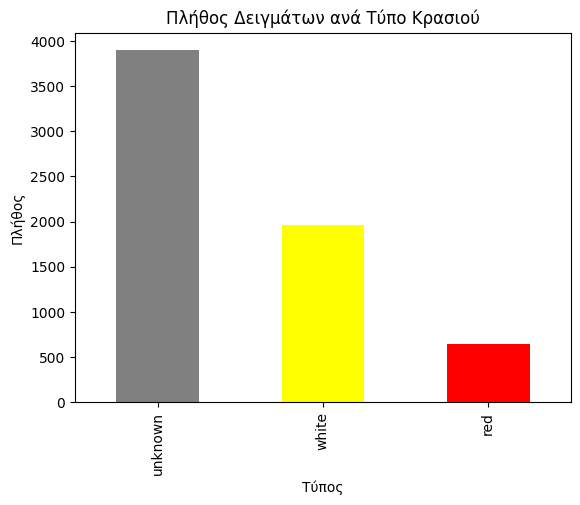

In [21]:
df["type"] = df["type"].fillna("unknown")

df["type"].value_counts().plot(kind="bar", color=["gray", "yellow", "red"])
plt.title("Πλήθος Δειγμάτων ανά Τύπο Κρασιού")
plt.xlabel("Τύπος")
plt.ylabel("Πλήθος")
plt.show()

#2. Μετατροπή τιμών & δημιουργία numpy arrays

In [22]:
mapping = {"unknown": 0, "white": 1, "red": 2}
df["type"] = df["type"].map(mapping)

x = df.drop(columns=["type"]).to_numpy()
y = df["type"].to_numpy()

print("x shape:", x.shape)
print("y shape:", y.shape)

x shape: (6497, 12)
y shape: (6497,)


# 3. Δημιουργία 2 συνόλων

In [28]:
df
known_records = df["type"] != 0
x_known = df.loc[known_records].drop(columns=["type"]).to_numpy()
y_known = df.loc[known_records, "type"].to_numpy()

unknown_records = df["type"] == 0
x_unknown = df.loc[unknown_records].drop(columns=["type"]).to_numpy()

print("x_known shape:", x_known.shape)
print("y_known shape:", y_known.shape)
print("x_unknown shape:", x_unknown.shape)

x_known shape: (2599, 12)
y_known shape: (2599,)
x_unknown shape: (3898, 12)


# 4. Train-Test (70-30)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(
    x_known,
    y_known,
    test_size=0.3,
    random_state=42,
    stratify=y_known
)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (1819, 12)
y_train: (1819,)
x_test: (780, 12)
y_test: (780,)


# 5. Random Forest και μέτρηση ακρίβειας

In [39]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

metrics = {
    "Set": ["Train", "Test"],
    "Accuracy": [
        accuracy_score(y_train, y_pred_train),
        accuracy_score(y_test, y_pred_test)
    ],
    "Precision": [
        precision_score(y_train, y_pred_train, average="weighted"),
        precision_score(y_test, y_pred_test, average="weighted")
    ],
    "Recall": [
        recall_score(y_train, y_pred_train, average="weighted"),
        recall_score(y_test, y_pred_test, average="weighted")
    ],
    "F1": [
        f1_score(y_train, y_pred_train, average="weighted"),
        f1_score(y_test, y_pred_test, average="weighted")
    ]
}

results_df = pd.DataFrame(metrics)
print(results_df)

     Set  Accuracy  Precision    Recall        F1
0  Train  0.999450   0.999451  0.999450  0.999450
1   Test  0.998718   0.998725  0.998718  0.998719


Επειδή στα δείγματα αλλά και γενικότερα φαίνεται τα λευκά κρασιά να είναι πολύ περισσότερα από τα κόκκινα κρασιά και άρα υπάρχει ανισορροπία στα δεδομένα, η πιο κατάλληλη μετρική θα είναι η f1 αφού με την χρήση των μεθόδων precision/recall που ελέγχουν το ποσοστό επιτυχίας στην μία κατηγορία, πετυχαίνουν πιο ασφαλή συμπεράσματα όταν αφορά μη δίκαια κατανεμημένα δεδομένα.